Text(0.5, 1.0, 'histogram of normalized image')

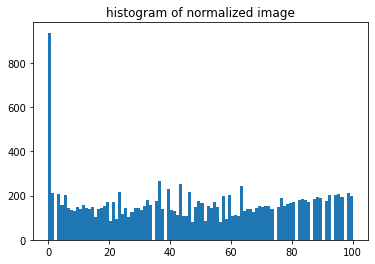

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/latentFP.jpg",0)
equ = cv2.equalizeHist(img)


plt.hist(equ.flat, bins=100, range=(0,100))
plt.title("histogram of normalized image")

Text(0.5, 1.0, 'Normalized image')

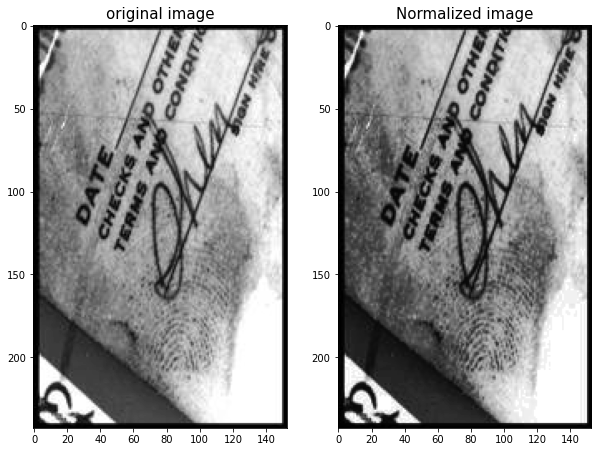

In [2]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image', fontsize =15)
ax[1].imshow(equ, cmap='gray')
ax[1].set_title('Normalized image', fontsize =15)

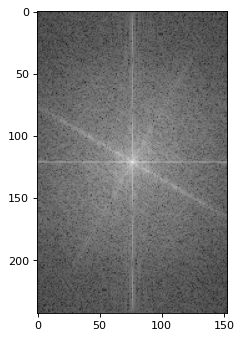

In [3]:
from scipy import fftpack
equ_fourier = np.fft.fftshift(np.fft.fft2(equ))
plt.figure(num=None, figsize=(5, 5), dpi=80)
plt.imshow(np.log(abs(equ_fourier)), cmap='gray');

Text(0.5, 1.0, 'fft vertical')

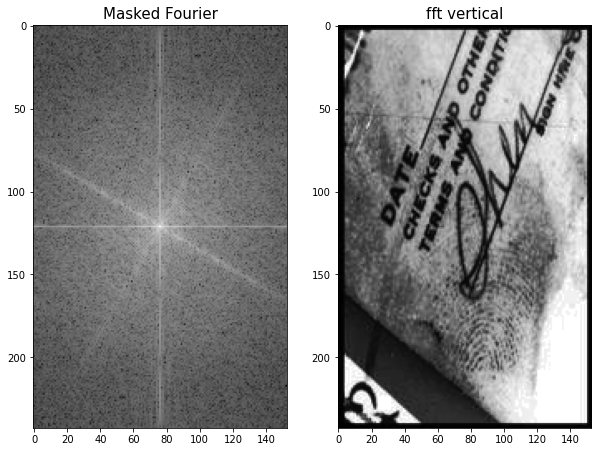

In [4]:
def fourier_masker_ver(image):
    image_fourier =np.fft.fftshift(np.fft.fft2(image))
    image_fourier[:225, 235:240] = 1
    image_fourier[-225:,235:240] = 1
    return image_fourier

    
image_fourier_v=fourier_masker_ver(equ)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(image_fourier_v)), cmap='gray')
ax[0].set_title('Masked Fourier', fontsize =15)

ax[1].imshow(abs(np.fft.ifft2(image_fourier_v)), cmap='gray')
ax[1].set_title('fft vertical', fontsize =15)

Text(0.5, 1.0, 'fft horizontal')

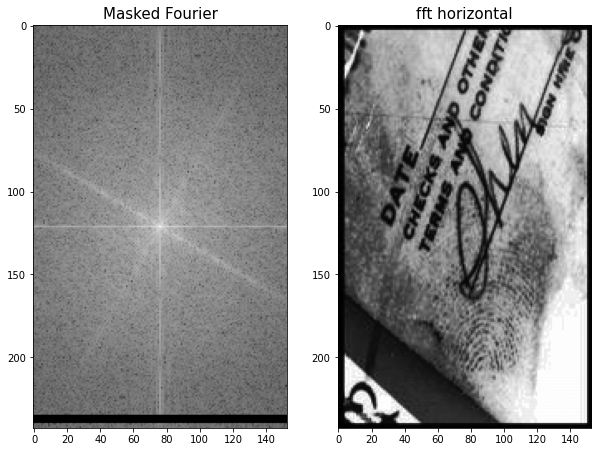

In [5]:
def fourier_masker_hor(image):
    
    image_fourier =np.fft.fftshift(np.fft.fft2(equ))
    image_fourier[235:240,:230] = 1
    image_fourier[235:240,-230:] = 1
    return image_fourier
    
image_fourier_h=fourier_masker_hor(equ)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(image_fourier_h)), cmap='gray')
ax[0].set_title('Masked Fourier', fontsize = 15)
ax[1].imshow(abs(np.fft.ifft2(image_fourier_h)), 
                     cmap='gray')

ax[1].set_title('fft horizontal', fontsize = 15)

Text(0.5, 1.0, ' after fft ')

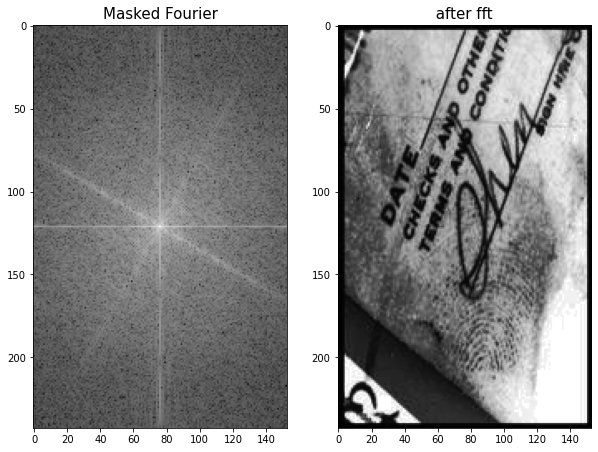

In [6]:
def fourier_masker(image):
    image_fourier =np.fft.fftshift(np.fft.fft2(image))
    return image_fourier
im_fourier=fourier_masker(equ)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(im_fourier)), cmap='gray')
ax[0].set_title('Masked Fourier', fontsize = 15)
ax[1].imshow(abs(np.fft.ifft2(im_fourier)), 
                     cmap='gray')

ax[1].set_title(' after fft ', fontsize = 15)

Text(0.5, 1.0, ' gaussian filtered image ')

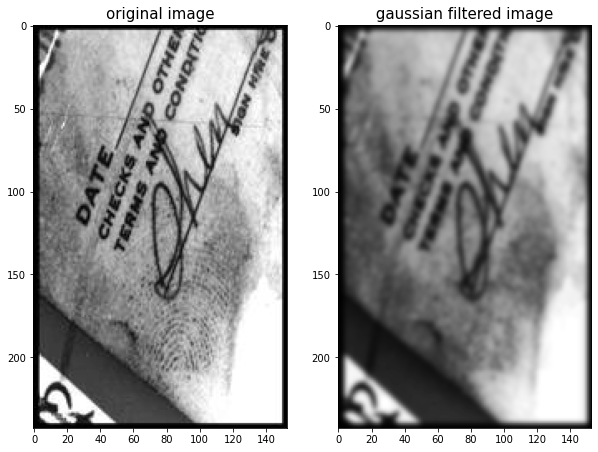

In [37]:


gaussian_im = gaussian(abs(np.fft.ifft2(im_fourier)), sigma=1.5, mode='constant', cval=0.0)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image', fontsize = 15)
ax[1].imshow(gaussian_im, cmap='gray')

ax[1].set_title(' gaussian filtered image ', fontsize = 15)

Text(0.5, 1.0, ' binarry image ')

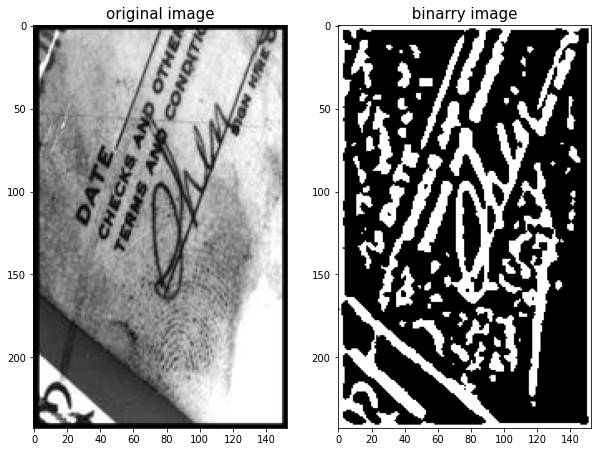

In [38]:

gaussian_im =gaussian_im.astype('uint8')
binarry_im = cv2.adaptiveThreshold(gaussian_im, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image', fontsize = 15)
ax[1].imshow(binarry_im, cmap='gray')

ax[1].set_title(' binarry image ', fontsize = 15)
